### Introduction

Clustering is an unsupervised machine learning technique used to group similar data points based on their features. In this assignment, we apply clustering algorithms on the Iris dataset — a classical dataset in pattern recognition that includes measurements of iris flowers from three different species.

Since clustering does not use label information, we will drop the species column and explore the natural grouping within the data using two algorithms:
- **KMeans Clustering**
- **Hierarchical Clustering**

We aim to visualize and understand how well these methods separate the flower types based on their petal and sepal characteristics.


In [7]:
from sklearn.datasets import load_iris
import pandas as pd

# loading Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# show the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<u><b>2A. KMeans Clustering</b></u>

KMeans is a partitioning algorithm that divides the data into K distinct clusters based on feature similarity. It randomly initializes centroids, assigns points to nearest centroid, recalculates centroids, and repeats until convergence.
It is suitable for Iris because the data has clear, continuous numerical features and we assume roughly 3 natural clusters.

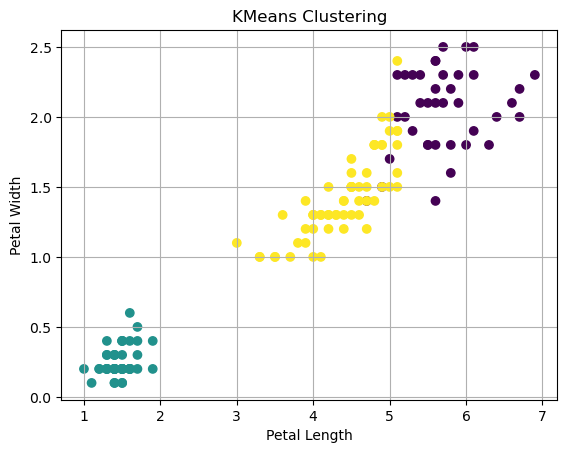

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df)

# Visualizing clusters (using 2 features for 2D plotting)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['kmeans_cluster'], cmap='viridis')
plt.title("KMeans Clustering")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.grid(True)
plt.show()


<u><b>2B. Hierarchical Clustering</b></u>
Hierarchical Clustering builds a tree of clusters using agglomerative or top-down (divisive) approaches. It merges the closest clusters step-by-step until one single cluster remains. It is good for Iris because it reveals hierarchical relationships between flower types, and doesn't require pre-defining K.

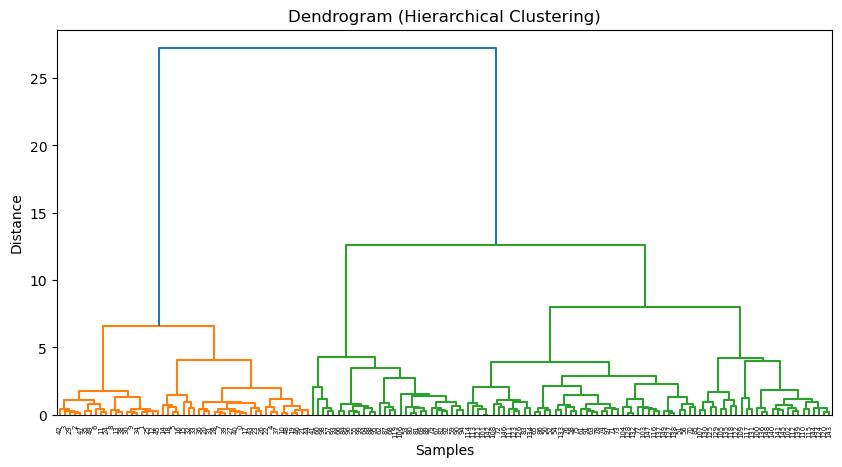

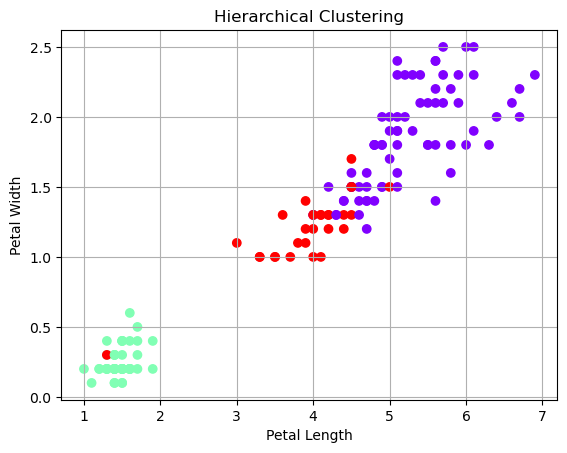

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('kmeans_cluster', axis=1))

# dendrogram
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# agglomerative Clustering
hier_cluster = AgglomerativeClustering(n_clusters=3)
df['hier_cluster'] = hier_cluster.fit_predict(scaled_data)

# visualize clusters
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['hier_cluster'], cmap='rainbow')
plt.title("Hierarchical Clustering")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.grid(True)
plt.show()


###  Conclusion

Both **KMeans** and **Hierarchical Clustering** were successfully applied to the Iris dataset. Without using any label information, the algorithms were able to form distinct clusters, showing that the dataset has strong internal structure.

- **KMeans** performed efficiently and formed clear, well-separated clusters, confirming that three natural groups exist.
- **Hierarchical Clustering** provided deeper insights into the relationships between data points through the dendrogram, and visually grouped the flowers in a similar pattern.

These results demonstrate the power of unsupervised learning for exploratory data analysis and confirm that the Iris dataset is well-suited for clustering tasks.
